In [3]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tulki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#https://jefferies.zoom.us/j/94408798293?pwd=bnU1NkxlOFFTU1hmUEZ1bGplOHFtUT09#success

In [2]:
# use VADER to perform sentiment analysis on stored news articles
analyser = SentimentIntensityAnalyzer()

def comp_score(text):
   return analyser.polarity_scores(text)["compound"]   
  
#news_df["sentiment"] = news_df["News"].apply(comp_score)

In [14]:
f = open('JD.txt', 'r')
text = f.read()
text

"Neuberger Berman, founded in 1939, is a private, independent, employee-owned investment manager. The firm manages a range of strategies—including equity, fixed income, quantitative and multi-asset class, private equity, real estate and hedge funds—on behalf of institutions, advisors and individual investors globally. With offices in 35 countries, Neuberger Berman's diverse team has 2,345 professionals. For six consecutive years, the company has been named first or second in Pensions & Investments Best Places to Work in Money Management survey (among those with 1,000 employees or more). The firm was awarded an A+ in every category in the latest 2020 Principles for Responsible Investment (PRI) report for our approach to ESG integration across asset classes. The firm manages\xa0$405 billion\xa0in client assets as of\xa0December 31, 2020. For more information, please visit our website at\xa0www.nb.com.\nSummary:\nSeeking a highly motivated and experienced equity Data Analyst/Data Scientis

In [17]:
import re

In [18]:
re.sub('\n*', '', text)

"Neuberger Berman, founded in 1939, is a private, independent, employee-owned investment manager. The firm manages a range of strategies—including equity, fixed income, quantitative and multi-asset class, private equity, real estate and hedge funds—on behalf of institutions, advisors and individual investors globally. With offices in 35 countries, Neuberger Berman's diverse team has 2,345 professionals. For six consecutive years, the company has been named first or second in Pensions & Investments Best Places to Work in Money Management survey (among those with 1,000 employees or more). The firm was awarded an A+ in every category in the latest 2020 Principles for Responsible Investment (PRI) report for our approach to ESG integration across asset classes. The firm manages\xa0$405 billion\xa0in client assets as of\xa0December 31, 2020. For more information, please visit our website at\xa0www.nb.com.Summary:Seeking a highly motivated and experienced equity Data Analyst/Data Scientist wi

In [25]:
stemmer = nltk.stem.SnowballStemmer('english')
text = stemmer.stem(text)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [29]:
counts = vectorizer.fit_transform([text])
print(counts.toarray())

[[ 1  1  2  1  1  1  1  1  2  1  1  1  1  4  1  1  1  2  1 23  1  1  1  2
   1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  2  1  2  1  1
   1  2  1  1 12  1  1  1  1  1  1  1  1  1  1  1  1  1  1  8  1  1  1  1
   1  5  1  1  1  1  2  4  1  1  6  1  2  2  1  2  1  1  2  1  1  1  1  1
  13  1  1  1  2  1  3  1  3  1  3  1  2  1  1  1  1  1  1  3  1  2  1  1
   2  1  1  1  2  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  2  1  5  1
   2  5  1  2  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1
   1  1  1  5  1  1  1  1  1  3  1  1  1  1  1  1  1  2  2  1  1  2  1  2
   2  1  1  1  1  1  1  6  1 10  1  1  1  1  1  1  1  1  8  3  1  1  1  2]]


In [30]:
vectorizer.get_feature_names()

['000',
 '1939',
 '2020',
 '31',
 '345',
 '35',
 '405',
 'able',
 'across',
 'actionable',
 'advanced',
 'advisors',
 'algorithms',
 'alternative',
 'among',
 'an',
 'analyst',
 'analysts',
 'analytical',
 'and',
 'apply',
 'approach',
 'as',
 'asset',
 'assets',
 'at',
 'attentive',
 'awarded',
 'been',
 'behalf',
 'berman',
 'best',
 'beyond',
 'big',
 'billion',
 'both',
 'category',
 'class',
 'classes',
 'client',
 'closely',
 'collaborate',
 'collaborative',
 'colleagues',
 'com',
 'communication',
 'company',
 'computing',
 'consecutive',
 'contribute',
 'countries',
 'curious',
 'data',
 'december',
 'deep',
 'degree',
 'demonstrated',
 'detail',
 'develop',
 'distributed',
 'diverse',
 'econometrics',
 'edges',
 'employee',
 'employees',
 'engineering',
 'equities',
 'equity',
 'equivalent',
 'esg',
 'estate',
 'evaluating',
 'every',
 'experience',
 'experienced',
 'extraction',
 'feature',
 'finance',
 'financial',
 'firm',
 'first',
 'fixed',
 'for',
 'founded',
 'from',
 '

In [32]:
counts = pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names())

In [33]:
counts.sort_values(ascending=False)

and         23
in          13
data        12
to          10
equity       8
            ..
money        1
modules      1
modeling     1
metrics      1
000          1
Length: 216, dtype: int64

In [34]:
text

"neuberger berman, founded in 1939, is a private, independent, employee-owned investment manager. the firm manages a range of strategies—including equity, fixed income, quantitative and multi-asset class, private equity, real estate and hedge funds—on behalf of institutions, advisors and individual investors globally. with offices in 35 countries, neuberger berman's diverse team has 2,345 professionals. for six consecutive years, the company has been named first or second in pensions & investments best places to work in money management survey (among those with 1,000 employees or more). the firm was awarded an a+ in every category in the latest 2020 principles for responsible investment (pri) report for our approach to esg integration across asset classes. the firm manages\xa0$405 billion\xa0in client assets as of\xa0december 31, 2020. for more information, please visit our website at\xa0www.nb.com.\nsummary:\nseeking a highly motivated and experienced equity data analyst/data scientis

In [36]:
import nltk
nltk.download('punkt')

print(nltk.word_tokenize(text))

['neuberger', 'berman', ',', 'founded', 'in', '1939', ',', 'is', 'a', 'private', ',', 'independent', ',', 'employee-owned', 'investment', 'manager', '.', 'the', 'firm', 'manages', 'a', 'range', 'of', 'strategies—including', 'equity', ',', 'fixed', 'income', ',', 'quantitative', 'and', 'multi-asset', 'class', ',', 'private', 'equity', ',', 'real', 'estate', 'and', 'hedge', 'funds—on', 'behalf', 'of', 'institutions', ',', 'advisors', 'and', 'individual', 'investors', 'globally', '.', 'with', 'offices', 'in', '35', 'countries', ',', 'neuberger', 'berman', "'s", 'diverse', 'team', 'has', '2,345', 'professionals', '.', 'for', 'six', 'consecutive', 'years', ',', 'the', 'company', 'has', 'been', 'named', 'first', 'or', 'second', 'in', 'pensions', '&', 'investments', 'best', 'places', 'to', 'work', 'in', 'money', 'management', 'survey', '(', 'among', 'those', 'with', '1,000', 'employees', 'or', 'more', ')', '.', 'the', 'firm', 'was', 'awarded', 'an', 'a+', 'in', 'every', 'category', 'in', 'the

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tulki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
# import these modules
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tulki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


"neuberger berman, founded in 1939, is a private, independent, employee-owned investment manager. the firm manages a range of strategies—including equity, fixed income, quantitative and multi-asset class, private equity, real estate and hedge funds—on behalf of institutions, advisors and individual investors globally. with offices in 35 countries, neuberger berman's diverse team has 2,345 professionals. for six consecutive years, the company has been named first or second in pensions & investments best places to work in money management survey (among those with 1,000 employees or more). the firm was awarded an a+ in every category in the latest 2020 principles for responsible investment (pri) report for our approach to esg integration across asset classes. the firm manages\xa0$405 billion\xa0in client assets as of\xa0december 31, 2020. for more information, please visit our website at\xa0www.nb.com.\nsummary:\nseeking a highly motivated and experienced equity data analyst/data scientis

In [42]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining python=3.8: 100%|##########| 4/4 [00:00<00:00, 11.67it/s]
                                                                   

Examining conflict for wordcloud python:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - wordcloud==1.4.1 -> python[version='2.7.*|3.5.*|3.6.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [45]:
# instantiate a word cloud object
text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
text_wc.generate(text)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

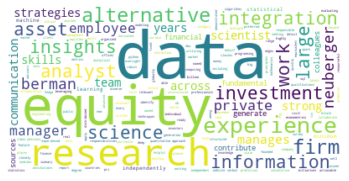

In [47]:
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

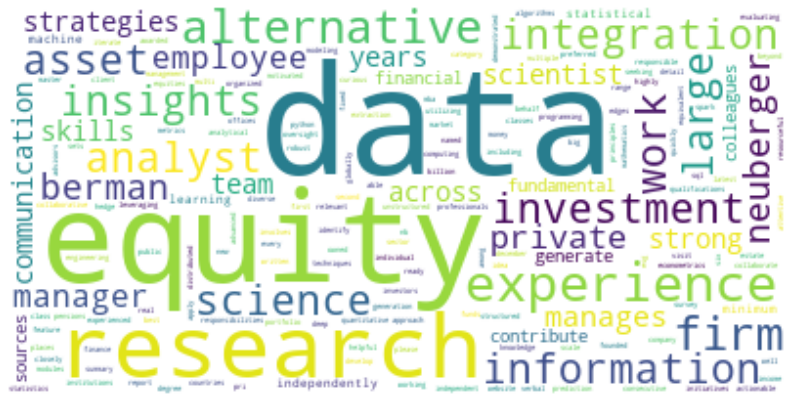

In [49]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
import numpy as np
from PIL import Image
nb_mask = np.array(Image.open('neuberger-berman-logo-vector.png'))

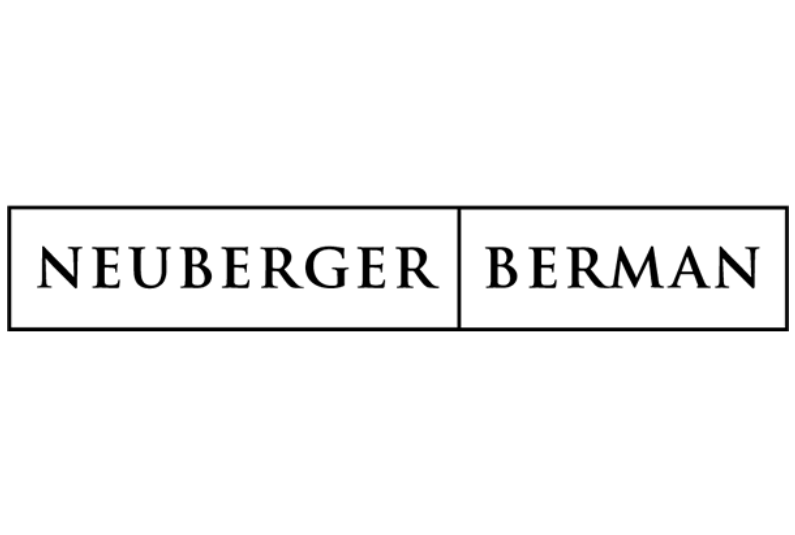

In [56]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(nb_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

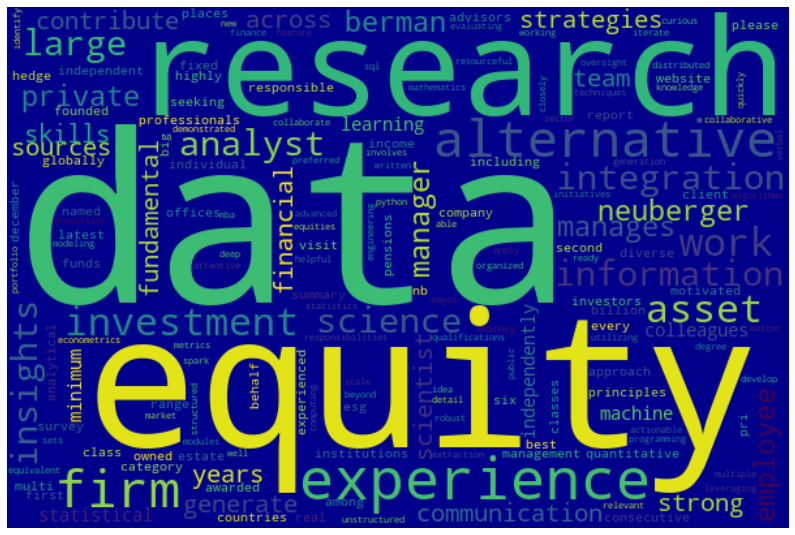

In [59]:
# instantiate a word cloud object
text_wc = WordCloud(background_color='darkblue', max_words=2000, mask=nb_mask, stopwords=stopwords)

# generate the word cloud
text_wc.generate(text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()